# Hands On 1

## Topics
_Audio Processing_

## Personal Identity
|Nama Mahasiswa|Nomor Induk Mahasiswa|
|---|---|
|Kevin Simorangkir|121140150|

## Instructions
1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
- Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf s yang panjang (essssss). Kelima, bersuara volume sedang, mengucapkan kata brrbrbrbrb / lip trill.
- Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
- Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
- Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
- Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
- Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
- Lakukan fading untuk bagian awal dan akhir dari audio
3. Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini.
4. Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Cara anda merekam haruslah sedikit unik:
- Anda harus berbicara selama 20 detik.
- Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
- Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
- Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
- Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).
- Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.
---

## Tahap Persiapan
1. Siapkan Library / Pustaka yang akan digunakan dalam penugasan ini. Dalam hal ini menggunakan 4 (empat) pustaka yaitu sebagai berikut `matplotlib` , `numpy` , `os`, dan `wave`

In [16]:
import numpy as np #pustaka numpy
import matplotlib.pyplot as plt #pustaka matplotlib
import os #pustaka os
import wave #pustaka wave

2. Mempersiapkan audio yang diminta sesuai `##Instructions` . Dalam hal ini telah dipersiapkan untuk file _audio_ nya di _path_ `Technology-Multimedia/Audio`. Dikategorikan menjadi 5 yaitu Low, Medium, Hard, Brrbbrbrb, dan Esss.

## Tahap Eksekusi
1. Mengambil data dari File Audio yang telah disediakan melalui folder `Audio`. Dengan kode program sebagai berikut :

In [17]:
#mengambil data audio
audio_data = os.path.join(os.getcwd(), "Audio", "Low.wav")
if not os.path.exists(audio_data):  # Check if file exists
    # Print error message if file not found
    print(f"Data dari {audio_data} tidak ditemukan")
    exit()  # Exit if file not found

In [18]:
with wave.open(audio_data, "r") as audio_wave: # Open audio file
    audio_frames = audio_wave.readframes(-1) # Read audio frames
    file_data = np.frombuffer(audio_frames, dtype="int16") # Convert frames to numpy array
    sample_rate = audio_wave.getframerate() # Get sample rate
    channels = audio_wave.getnchannels() # Get number of channels


In [19]:
print(f"Sample rate: {sample_rate} Hz") #menampilkan sample rate
print(f"Channels: {channels}") #menampilkan jumlah channel
print(f"Total frames: {len(file_data)}") #menampilkan total frame
print(f"Duration: {len(file_data) / sample_rate} seconds") #menampilkan durasi

Sample rate: 44100 Hz
Channels: 1
Total frames: 143360
Duration: 3.250793650793651 seconds


2. Memisahkan data file `audio` menjadi 2 sama dengan kanan dan juga kiri.

In [20]:
file_data = file_data.reshape(-1, channels) #mengubah bentuk array
print(f"Shape: {file_data.shape}")  # menampilkan bentuk array


audio_kiri = file_data[:, 0] #mengambil data channel kiri
print(f"Audio kiri: {len(audio_kiri)}")  # menampilkan data channel kiri


audio_kanan = file_data[:, 1] #mengambil data channel kanan
print(f"Audio kanan: {len(audio_kanan)}")  # menampilkan data channel kanan

Shape: (143360, 1)
Audio kiri: (143360,)
Audio kanan: [0 0 0 ... 3 4 6]


3. Membuat visualisasi dari audio yang ada

In [25]:
sample_audio = len(audio_kiri) #mengambil panjang data audio
detik_audio = np.arange(sample_audio) / sample_rate #mengambil detik audio

print(f"Sample audio: {sample_audio}") #menampilkan sample audio
print(f"Detik audio: {detik_audio}") #menampilkan detik audio

sumbu_waktu = np.linspace(0, sample_audio / sample_rate, sample_audio) #mengambil sumbu waktu
print(f"Sumbu waktu: {sumbu_waktu}") #menampilkan sumbu waktu

Sample audio: 143360
Detik audio: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.25072562e+00
 3.25074830e+00 3.25077098e+00]
Sumbu waktu: [0.00000000e+00 2.26758951e-05 4.53517903e-05 ... 3.25074830e+00
 3.25077097e+00 3.25079365e+00]


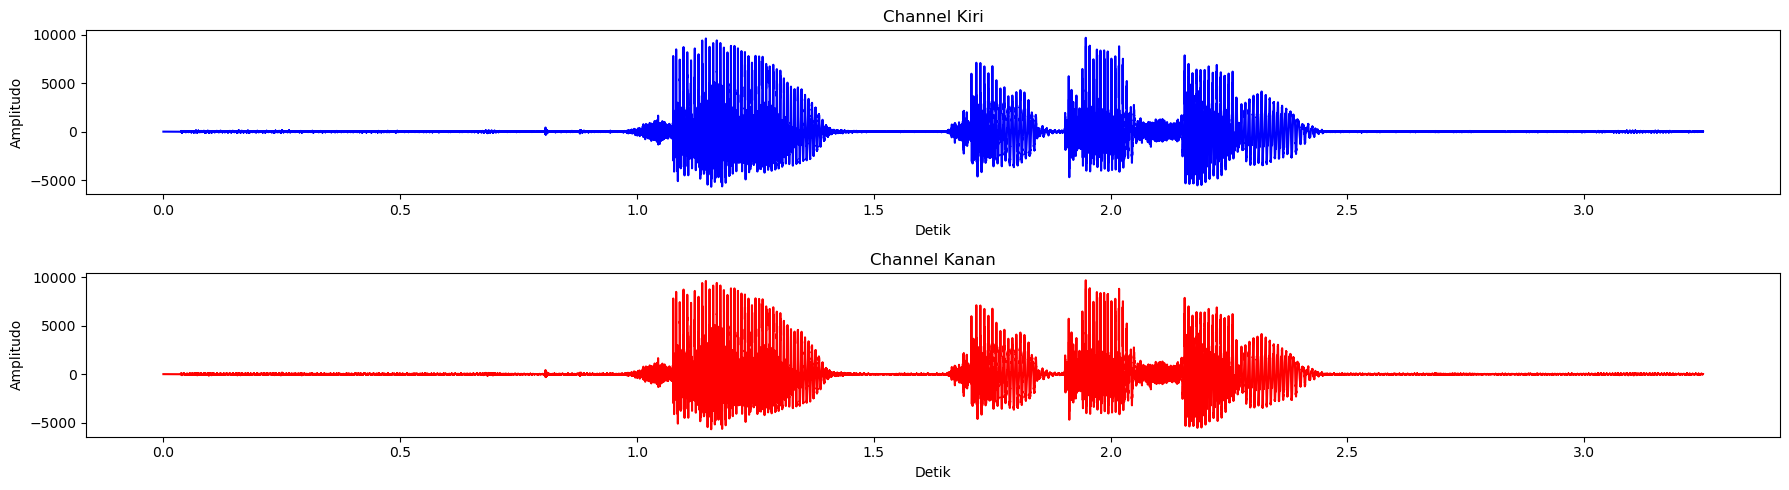

In [26]:
ax, fig= plt.subplots(2, 1, figsize=(18, 5)) #membuat plot
fig[0].plot(sumbu_waktu, audio_kiri, color="blue", label="left") #plot channel kiri
fig[0].set_title("Channel Kiri") #judul plot
fig[0].set_xlabel("Detik") #label x
fig[0].set_ylabel("Amplitudo") #label y
fig[1].plot(sumbu_waktu, audio_kanan, color="red", label="right") #plot channel kanan
fig[1].set_title("Channel Kanan") #judul plot
fig[1].set_xlabel("Detik") #label x
fig[1].set_ylabel("Amplitudo") #label y
plt.tight_layout() #plot rapi
plt.show() #menampilkan plot

4. Membuat visualisasi dalaman dari pada file audio tersebut. Masih sama dengan menggunakan `audio.wav`

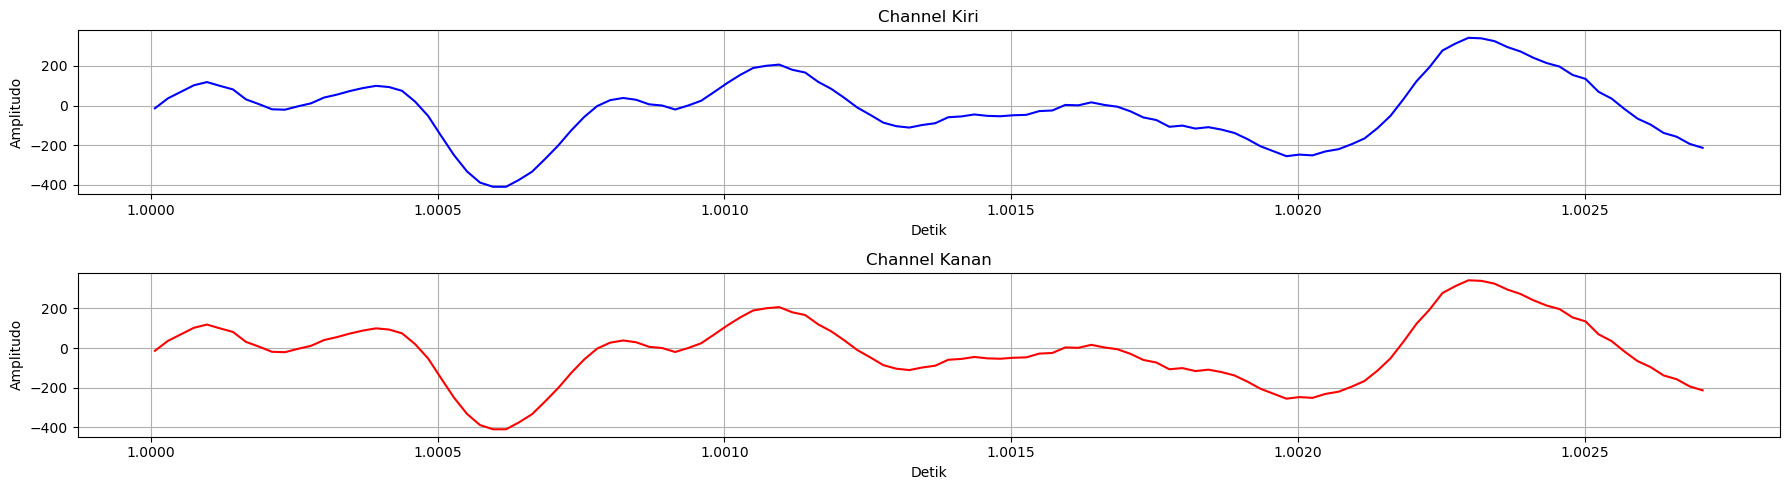

In [29]:
ax, fig= plt.subplots(2, 1, figsize=(18, 5)) #membuat plot
fig[0].plot(sumbu_waktu[44100:44220], audio_kiri[44100:44220], color="blue", label="left")  # plot channel kiri
fig[0].set_title("Channel Kiri") #judul plot
fig[0].set_xlabel("Detik") #label x
fig[0].set_ylabel("Amplitudo") #label y
fig[0].grid()  # menambahkan grid
fig[1].plot(sumbu_waktu[44100:44220], audio_kanan[44100:44220], color="red", label="right")  # plot channel kanan
fig[1].set_title("Channel Kanan") #judul plot
fig[1].set_xlabel("Detik") #label x
fig[1].set_ylabel("Amplitudo") #label y
fig[1].grid() #menambahkan grid
plt.tight_layout() #plot rapi
plt.show() #menampilkan plot

In [32]:
print("Data dari audio kiri adalah: ", audio_kiri[44100:44220])  # menampilkan data audio kiri
print("Data dari audio kanan adalah: ", audio_kanan[44100:44220])

Data dari audio kiri adalah:  [ -14   36   69  102  118   99   81   31    7  -19  -21   -4   11   40
   55   73   88   99   93   74   20  -52 -152 -250 -332 -388 -409 -409
 -374 -333 -269 -202 -126  -58   -3   27   38   29    6    0  -20    0
   24   68  113  154  189  200  206  180  166  119   84   39  -10  -47
  -86 -104 -111  -98  -89  -59  -55  -45  -52  -54  -49  -47  -28  -25
    3    1   16    3   -6  -29  -60  -73 -107 -101 -116 -109 -121 -138
 -169 -205 -230 -255 -247 -251 -231 -220 -195 -166 -114  -52   32  122
  193  277  312  341  338  324  294  272  240  214  196  154  134   69
   35  -18  -66  -96 -138 -157 -193 -213]
Data dari audio kanan adalah:  [ -14   36   69  102  118   99   81   31    7  -19  -21   -4   11   40
   55   73   88   99   93   74   20  -52 -152 -250 -332 -388 -409 -409
 -374 -333 -269 -202 -126  -58   -3   27   38   29    6    0  -20    0
   24   68  113  154  189  200  206  180  166  119   84   39  -10  -47
  -86 -104 -111  -98  -89  -59  -55  -45  -52